### Seaborn Library

####  Objectives : 
To learn
- Box Plot 
- Violin Plot 
- Overlaying Plot 
- Swarm Plot 
- Heatmap 
- Histogram 
- Bar Plot 
- Factor Plot 
- Density Plot 
- Joing Distribution Plot 

##### Reference : https://elitedatascience.com/python-seaborn-tutorial 

Pokemon dataset is used. 

### Structure of data 
pokemon_data 
Name, Type 1, Type 2, Total, HP, Attack, Defense, Sp. Atk,  Sp. Def,Speed,Stage, Legendary 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# First generation = Pokemon dataset 

In [3]:
pokemon_data = pd.read_csv("C:/Users/aster/AnacondaProjects/Jupyter - EDA Learning/Pokemon.csv",encoding="cp1252",index_col=0)

In [4]:
pokemon_data.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [5]:
pokemon_data.dtypes

Name         object
Type 1       object
Type 2       object
Total         int64
HP            int64
Attack        int64
Defense       int64
Sp. Atk       int64
Sp. Def       int64
Speed         int64
Stage         int64
Legendary      bool
dtype: object

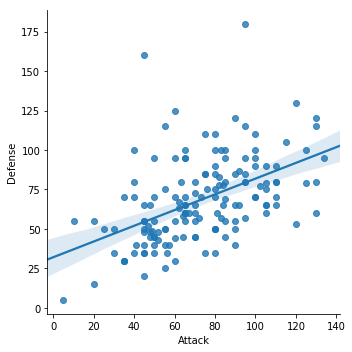

In [6]:
# Seaborn makes scatter plot in lmplot() 
# Way 1 : Pass data to DataFrame, pass col names to x= , y=
# Way 2 : Pass data in Series 
# Compare Attack and Defense 

sns.lmplot(x="Attack", y="Defense", data=pokemon_data)

In [ ]:
# Seaborn is actually used for fittin and plotting regression line 
# set fit_reg = False to remove regression line , hue="Stage" to colour points by Pokemon's evolution stage

sns.lmplot(x='Attack',y='Defense', data = pokemon_data, 
           fit_reg= False, hue="Stage")
plt.show()

In [ ]:
# Plot using Seaborn
sns.lmplot(x='Attack', y='Defense', data=pokemon_data,
           fit_reg=False, 
           hue='Stage')
 
# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

In [ ]:
# Get Box Plot for combat stats
sns.boxplot(data=pokemon_data)

#### But there're columns we could remove 
#### For example: Remove Total since there's individual stats
#### Remove Stage and Legendary columns as there're not combat stats

### Pre-format has to be done in DataFrame

In [ ]:
#Pre-format Data Frame 
processed_pokemon = pokemon_data.drop(['Total','Stage','Legendary'],axis=1)

# New boxplot
sns.boxplot(data=processed_pokemon)

### Violion Plot in Seaborn

In [ ]:
# Set theme
sns.set_style('whitegrid')

# Violin plot
sns.violinplot(x='Type 1', y='Attack', data=pokemon_data)


### Swarm Plot 

In [ ]:
sns.swarmplot(x='Type 1', y='Attack', data=pokemon_data)

### Overlaying Plot

In [ ]:
# Make figure larger 
# Plot violin plot and set inner=None to remove bars inside violins 
# Plot swarm plot and make the points black 
# Set title using Matplolib

plt.figure(figsize=(10,6))

#Create plot 
sns.violinplot(x='Type 1', y='Attack', data=pokemon_data, inner=None)
sns.swarmplot(x='Type 1', y='Attack', data=pokemon_data, color='k',alpha=0.7)

plt.title('Attack by Type')

### Use Pandas melt()

In [ ]:
# Melt DataFrame 
melted_df = pd.melt(processed_pokemon, id_vars=["Name","Type 1","Type 2"], 
                                                var_name= "Stat")
melted_df.head()

In [ ]:
print(processed_pokemon.shape)
print(melted_df.shape)

In [ ]:
# Swarmplot with melted_df 
sns.swarmplot(x='Stat',y='value',data=melted_df, hue='Type 1')

In [ ]:
# Enlarge the plot 
# Separate points by hue using argument split = True 
# Adjust y-axis limits to end at 0 
# Place the legend to the right 

plt.figure(figsize=(10,6))

sns.swarmplot(x="Stat",y="value", data=melted_df, hue="Type 1", split=True)

plt.ylim(0,260)

plt.legend(bbox_to_anchor=(1,1),loc=2)

### Heatmap

In [ ]:
corr = processed_pokemon.corr()

# Heatmap
sns.heatmap(corr)

### Histogram

In [ ]:
sns.distplot(pokemon_data.Attack)

### Bar Plot - use to visualize categorical variables 

In [ ]:
sns.countplot(x="Type 1", data=pokemon_data)

# Rotate x-labels 
plt.xticks(rotation=-45)

### Factor Plot  - Separate plots by categorical classes

In [ ]:
g = sns.factorplot(x='Type 1', y='Attack', data=pokemon_data, hue='Stage',col='Stage',kind='swarm')

# Rotate x-axis labels 
g.set_xticklabels(rotation=-45)


### Density Plot - display distribution between two variables

In [ ]:
sns.kdeplot(pokemon_data.Attack, pokemon_data.Defense)

### Joint Distribution Plot - combine information from scatter plots and histograms to give bi-variate distributions

In [ ]:
sns.jointplot(x='Attack',y='Defense',data=pokemon_data)